In [2]:
## 수정 코드(기간 설정, 2025-08-04~2025-08-06) 

import datetime
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 📅 기간 설정
start_date = datetime.date(2025, 8, 7)
end_date = datetime.date(2025, 8, 8)

# 검색 키워드
keywords = ["삼성", "lg", "현대차", "sk", "한화", "포스코", "롯데"]

# 🔷 크롬드라이버 옵션
options = Options()
# options.add_argument("--headless")  # 필요시 주석 해제
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
service = Service("chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)

# 전체 수집 데이터
all_data = []

# 날짜 반복
delta = datetime.timedelta(days=1)
date = start_date

while date <= end_date:
    date_str = date.strftime("%Y.%m.%d")
    date_compact = date.strftime("%Y%m%d")

    for keyword in keywords:
        # 네이버 뉴스 검색 URL
        url = (
            f"https://search.naver.com/search.naver?"
            f"ssc=tab.news.all"
            f"&query={keyword}"
            f"&sm=tab_opt"
            f"&sort=1"
            f"&photo=3"
            f"&field=0"
            f"&pd=3"
            f"&ds={date_str}"
            f"&de={date_str}"
            f"&docid="
            f"&related=0"
            f"&mynews=1"
            f"&office_type=3"
            f"&office_section_code="
            f"&news_office_checked="
            f"&nso=so:r,p:from{date_compact}to{date_compact}"
            f"&is_sug_officeid=0"
            f"&office_category=1"
            f"&service_area=0"
        )

        print(f"\n[{date_str}] {keyword} 검색 시작")
        driver.get(url)

        # 기사 로딩 대기
        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, 'span.sds-comps-text-type-headline1')
                )
            )
        except:
            print("⚠️ 기사 로딩 실패")
            continue

        # 페이지 스크롤 (5회)
        for _ in range(5):
            driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
            time.sleep(1)

        # 기사 블록 추출
        blocks = driver.find_elements(
            By.CSS_SELECTOR,
            'div.sds-comps-vertical-layout.sds-comps-full-layout'
        )

        print(f"🔍 기사 블록 개수: {len(blocks)}")

        for idx, block in enumerate(blocks, 1):
            # 언론사
            try:
                press = block.find_element(
                    By.CSS_SELECTOR,
                    'span.sds-comps-text-type-body2.sds-comps-profile-info-title-text'
                ).text
            except:
                press = ''

            # 제목
            try:
                title = block.find_element(
                    By.CSS_SELECTOR,
                    'span.sds-comps-text-type-headline1'
                ).text
            except:
                title = ''

            # 요약
            try:
                summary = block.find_element(
                    By.CSS_SELECTOR,
                    'span.sds-comps-text-type-body1'
                ).text
            except:
                summary = ''

            # 네이버뉴스 링크
            try:
                link = block.find_element(
                    By.CSS_SELECTOR,
                    'a[href*="n.news.naver.com"]'
                ).get_attribute("href")
            except:
                link = ''

            all_data.append({
                "날짜": date_str,
                "키워드": keyword,
                "언론사": press,
                "제목": title,
                "요약": summary,
                "네이버뉴스링크": link
            })

    date += delta

driver.quit()

# CSV 저장 (중복 제거)
df = pd.DataFrame(all_data)

# 제목 + 링크 기준으로 중복 제거
df.drop_duplicates(subset=["네이버뉴스링크"], inplace=True)

df.to_csv("naver_news_date_range.csv", index=False, encoding='utf-8-sig')
print("\n✅ 전체 크롤링 완료. CSV 저장됨: naver_news_date_range.csv")
print(f"총 수집 기사 수: {len(df)}")


[2025.08.07] 삼성 검색 시작
🔍 기사 블록 개수: 120

[2025.08.07] lg 검색 시작
🔍 기사 블록 개수: 78

[2025.08.07] 현대차 검색 시작
🔍 기사 블록 개수: 26

[2025.08.07] sk 검색 시작
🔍 기사 블록 개수: 72

[2025.08.07] 한화 검색 시작
🔍 기사 블록 개수: 40

[2025.08.07] 포스코 검색 시작
🔍 기사 블록 개수: 34

[2025.08.07] 롯데 검색 시작
🔍 기사 블록 개수: 30

[2025.08.08] 삼성 검색 시작
🔍 기사 블록 개수: 108

[2025.08.08] lg 검색 시작
🔍 기사 블록 개수: 34

[2025.08.08] 현대차 검색 시작
🔍 기사 블록 개수: 22

[2025.08.08] sk 검색 시작
🔍 기사 블록 개수: 42

[2025.08.08] 한화 검색 시작
🔍 기사 블록 개수: 22

[2025.08.08] 포스코 검색 시작
🔍 기사 블록 개수: 32

[2025.08.08] 롯데 검색 시작
🔍 기사 블록 개수: 18

✅ 전체 크롤링 완료. CSV 저장됨: naver_news_date_range.csv
총 수집 기사 수: 184


✅ 워드클라우드 저장: wordcloud_filtered.png


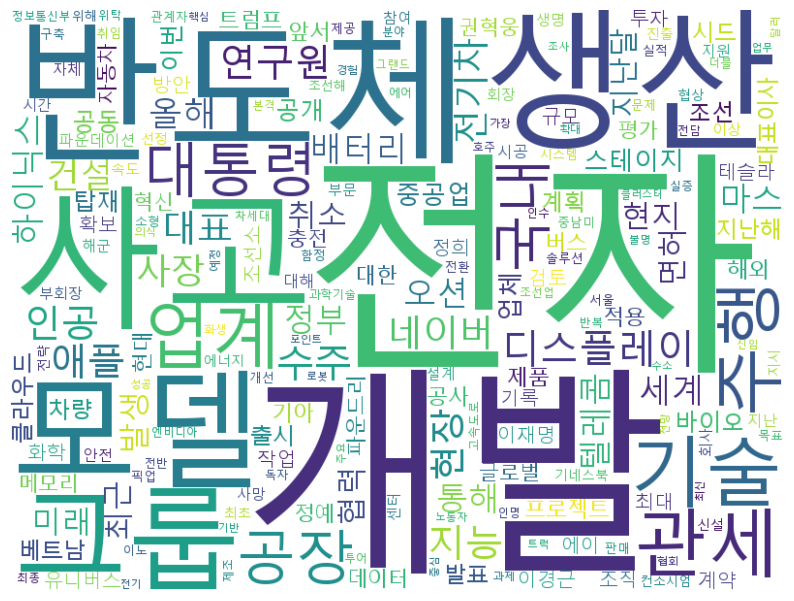

In [1]:
import pandas as pd
import re
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 🔷 1. 전처리 + 형태소 분석 함수
def extract_clean_nouns(df):
    """
    df의 '제목', '요약'을 합쳐서
    전처리(대괄호, 숫자 제거) + 불용어 처리 후 명사 추출
    """
    text = " ".join(df['제목'].fillna('')) + " " + " ".join(df['요약'].fillna(''))

    # 대괄호 안 제거
    text = re.sub(r'\[.*?\]', '', text)
    # 숫자 제거
    text = re.sub(r'\d+', '', text)

    # 형태소 분석
    okt = Okt()
    nouns = okt.nouns(text)

    # 불용어
    stopwords = [
        '삼성', 'lg', '롯데', 'sk', '현대차', '포스코', '한화',  # 6대 그룹
        '뉴스', '기사', '단독', '속보', '부음', '사진', '네이버'  # 기타 불용어
        '그룹', '기업', '산업', '사업', '증권', '만원', '지난'
        '국내', '시장', '미국', '한국', '중국'
    
    ]

    # 불용어 & 한 글자 제거
    clean_nouns = [n for n in nouns if n not in stopwords and len(n) > 1]

    return clean_nouns


# 🔷 2. 워드클라우드 시각화 함수
def generate_wordcloud(nouns, output_path=None):
    """
    nouns 리스트로 워드클라우드 생성 & 저장(optional)
    """
    from collections import Counter

    # 명사 빈도수
    counter = Counter(nouns)

    # 워드클라우드 생성
    wc = WordCloud(
        font_path='malgun.ttf',  # 윈도우의 경우
        background_color='white',
        width=800,
        height=600
    )

    plt.figure(figsize=(10,8))
    plt.axis('off')
    wc.generate_from_frequencies(counter)
    plt.imshow(wc, interpolation='bilinear')

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        print(f"✅ 워드클라우드 저장: {output_path}")

    plt.show()


# 🔷 3. 실행 예시
if __name__ == "__main__":
    # 파일 불러오기
    df = pd.read_csv("naver_news_date_range(250804~250808)_select.csv")
    df = df[df['셀렉'] == 't']

    # 명사 추출
    nouns = extract_clean_nouns(df)

    # 워드클라우드 생성
    generate_wordcloud(nouns, output_path="wordcloud_filtered.png")